In [1]:
import rdkit

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import MCS
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem import *
IPythonConsole.ipython_useSVG=False  

import os
from os import listdir
from os.path import isfile, join

from PIL import Image, ImageDraw, ImageFont
import PIL

import numpy as np
from IPython.display import Image 
import math

C:\Users\josef\AppData\Local\Temp/ipykernel_17480/1285213972.py:5: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS


In [2]:
files = os.listdir('pdbbindsdf20/')

In [3]:
print(files)

['1a07_ligand.sdf', '1a0q_ligand.sdf', '1a0t_ligand.sdf', '1a1b_ligand.sdf', '1a1c_ligand.sdf', '1a1e_ligand.sdf', '1a2c_ligand.sdf', '1a3e_ligand.sdf', '1a4g_ligand.sdf', '1a4h_ligand.sdf', '1a4k_ligand.sdf', '1a4m_ligand.sdf', '1a4q_ligand.sdf', '1a4r_ligand.sdf', '1a4w_ligand.sdf', '1a5g_ligand.sdf', '1a5h_ligand.sdf', '1a5v_ligand.sdf', '1a7c_ligand.sdf', '1a7t_ligand.sdf']


In [4]:
filecounter = 0
sdfarray=[]

In [5]:
#sdf to smiles
for file in files:
    sdf = Chem.SDMolSupplier('pdbbindsdf20/' + file )
    for i in sdf:
        smisdf = Chem.MolToSmiles(i)
    sdfarray.append(smisdf)

In [6]:
print(sdfarray)

['CCCCCN(CCCCC)C(=O)C(CCC(=O)O)NC(=O)C(Cc1ccccc1)NC(C)=O', 'CCCCC(NC(=O)CCC(=O)O)P(=O)(O)Oc1ccccc1', 'OCC1OC(OC2(CO)OC(CO)C(O)C2O)C(O)C(O)C1O', 'CCCCCN(CCCCC)C(=O)C(CCC(=O)O)NC(=O)C(Cc1ccc(OP(=O)(O)O)cc1)NC(C)=O', 'CC(=O)NC(Cc1ccc(OP(=O)(O)O)cc1)C(=O)NC(CCC(=O)O)C(=O)N(C)CCCC1CCCC1', 'CCCCC1CCCN(C(=O)C(CCC(=O)O)NC(=O)C(Cc2ccc(OP(=O)(O)O)cc2)NC(C)=O)C1', 'CC(C)CC(NC(=O)C(O)Cc1ccc(O)cc1)C(=O)N1C(C(=O)NC(CO)CCCNC(=N)N)CC2CCC(O)CC21', 'CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=O)C(Cc1ccccc1)NC(=O)C(CC(=O)O)NC(=O)C[NH3+])C(=O)N1CC=CC1C(=O)NCC(=O)NC(CCC(=O)O)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(C)C(=O)O', 'CC(=O)NC1C(NC(=N)N)C=C(C(=O)O)OC1C(O)C(O)CO', 'COC1=C2CC(C)CC(OC)C(O)C(C)/C=C(\\C)C(OC(N)=O)C(OC)/C=C\\C=C(/C)C(=O)NC(=CC1=O)C2=O', 'CC(=O)Nc1ccc(N2C(=O)C3C4CCC(NC(=O)OCC(=O)O)(CC4)C3C2=O)cc1', 'O=c1[nH]cnc2c1ncn2C1OC(CO)C(O)C1O', 'CCCN(CCc1ccccc1)C(=O)C1OC(C(=O)O)=CC([NH3+])C1NC(C)=O', 'Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(N)(=O)O)C(O)C2O)c(=O)[nH]1', 'CN(C)c1cccc2c(S(=O)(=O)NC(CCCNC(=N)N)C(=O)N3CCC

In [7]:
molarray = []
for sdf in sdfarray:    
    mol = Chem.MolFromSmiles(sdf)
    molarray.append(mol)

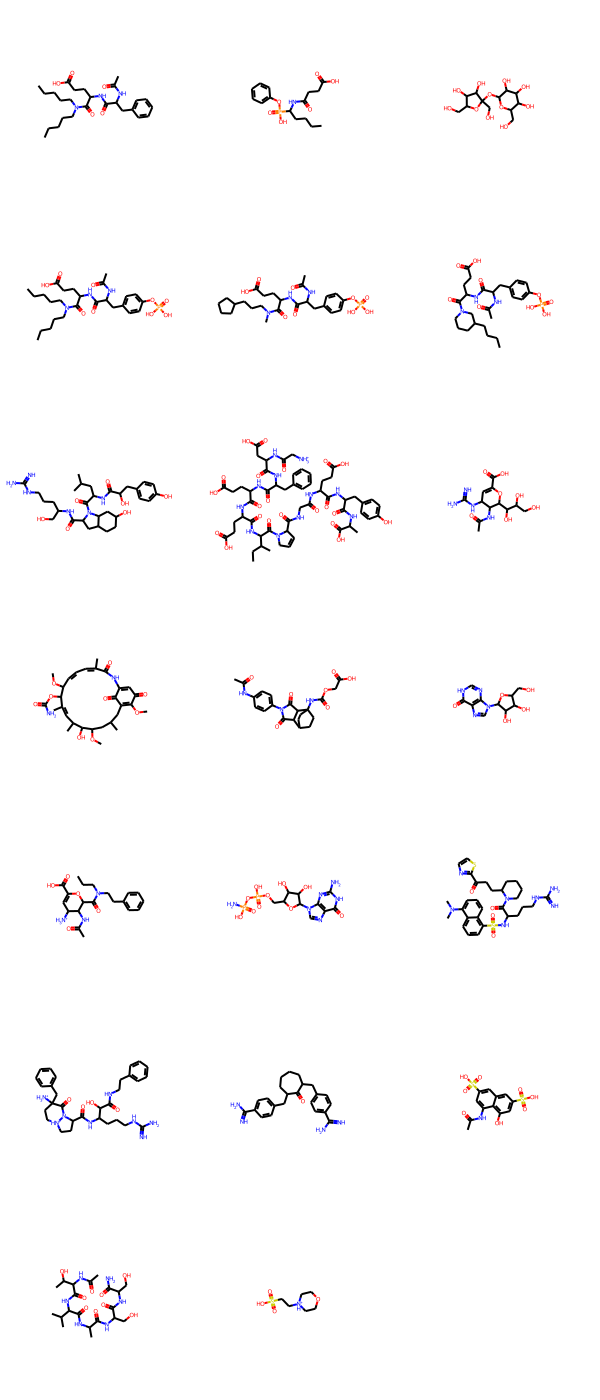

In [8]:
Draw.MolsToGridImage(molarray)

In [9]:
molarray2 = molarray.copy()

In [10]:
molnames =[]
for mol1 in files:
    for mol2 in files:
        molnames.append(mol1)
        molnames.append(mol2)

In [11]:
molcoloredarray = []
substructarray = []

substructfullarray = []

for mol1 in molarray:
    for mol2 in molarray2:
        mols = [mol1, mol2]
        res=rdFMCS.FindMCS(mols, ringMatchesRingOnly = True, completeRingsOnly = True)
        mol1c = mol1
        
        substructure1 = Chem.MolFromSmarts(res.smartsString)
        mol1.GetSubstructMatches(substructure1)
        matches1 = list(mol1.GetSubstructMatch(substructure1))
        matches2 = list(mol2.GetSubstructMatch(substructure1))
            
        #print(mol1.GetSubstructMatches(substructure1))
        molcolored = [mol1, mol2]
        molcoloredarray.append(molcolored)
        
        substructarray.append(matches1)
        substructarray.append(matches2)
        
        substructfullarray.append(substructure1)
        substructfullarray.append(substructure1)

In [12]:
molarrayflattened = [item for sublist in molcoloredarray for item in sublist]

In [13]:
imgarray = []
structurecount = 0
ccimgarray = []
for (i,j) in zip(molarrayflattened, molnames):
    subi = substructarray[structurecount]
    hit_ats = substructarray[structurecount]
    hit_bonds = []
    for bond in substructfullarray[structurecount].GetBonds():
        aid1 = hit_ats[bond.GetBeginAtomIdx()]
        aid2 = hit_ats[bond.GetEndAtomIdx()]
        hit_bonds.append(i.GetBondBetweenAtoms(aid1,aid2).GetIdx())

    img = Draw.MolToImage(i,  highlightAtoms=hit_ats, highlightBonds=hit_bonds, legend=j, useSVG=False)

    imgarray.append(img)
    
    ccore = MolFragmentToCXSmiles(i, i.GetSubstructMatch(substructfullarray[structurecount]), kekuleSmiles = True, isomericSmiles=False)
    ccoremol = Chem.MolFromSmiles(ccore)
    if (ccoremol != None):        
        ccoreimg = Draw.MolToImage(ccoremol, legend="common core")
    else:
        ccoreimg = PIL.Image.new(mode="RGB", size=(300,300))
            
    
    ccimgarray.append(ccoreimg)
    
    structurecount = structurecount + 1

In [14]:
w, h = imgarray[0].size

In [15]:
coresperfile = 50 * 2
filenumber = len(ccimgarray)/coresperfile
filenumber = math.ceil(filenumber)

In [16]:
filename = ('PDBBIND20x20molecules')
filenames = []
for x in range(0,filenumber):
    filenames.append(filename + str(x+1) + '.png')
    
imgarraycount = 0
for fname in filenames:
    new_image = PIL.Image.new('RGB', (int(w*3), int(h*len(imgarray[imgarraycount:imgarraycount+100])/2)))
    heightcount = 0
    for x in range(0, len(imgarray[imgarraycount:imgarraycount+coresperfile]), 2):
        new_image.paste(imgarray[imgarraycount + x], (0, heightcount*h))
        new_image.paste(imgarray[imgarraycount + x+1], (w, heightcount*h))
        new_image.paste(ccimgarray[imgarraycount + x], (w*2, heightcount*h))
        heightcount = heightcount + 1
    imgarraycount = imgarraycount + coresperfile 
    new_image.save(fname)